In [15]:
# 0 - RL - Teoría.ipynb
%load_ext autoreload
%autoreload 2
# tambien lo cargue aca
# https://colab.research.google.com/drive/1d3JDe-7Hra1a-1O_SWlFqBU7vpWh21oU#scrollTo=BjDemy9PzxTl
# pero no lo pude ejecutar en ninguna de las plataformas.
# original: https://colab.research.google.com/github/lab-ml-itba/Regresion-Logistica/blob/master/0%20-%20RL%20-%20Teor%C3%ADa.ipynb#scrollTo=-HgFcvPnzxT-

#import os
#os.environ["DISPLAY"]="localhost:10.0"
%reload_ext autoreload
%autoreload 2
#%matplotlib qt
import pandas as pd
import helper
from matplotlib import pyplot as plt
df = pd.read_csv('data/alturas-pesos-mils-train.csv')
df["Genero"]=(df["Genero"]!="Hombre").astype(int)
df.head() #Para visualizar las primeras 5 observaciones

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Unnamed: 0,Genero,Peso,Altura
0,7620,1,61.235,162.402
1,1837,0,97.432,181.908
2,3311,0,73.324,172.459
3,9478,1,55.193,157.748
4,7805,1,56.886,151.798


In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
X=df[['Peso','Altura']].values
y=df['Genero'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
clf = SGDClassifier(loss='log',penalty=None,max_iter=10)
clf.fit(X_train, y_train)
print(clf.predict(X_train[:2, :]))
print(y_train[:2])
print(clf.predict_proba(X_train[:2, :]))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
clf.coef_

[1 1]
[1 1]
[[0. 1.]
 [0. 1.]]
0.9201492537313433
0.9113636363636364


/home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[-6842.07031292,  2962.4191691 ]])

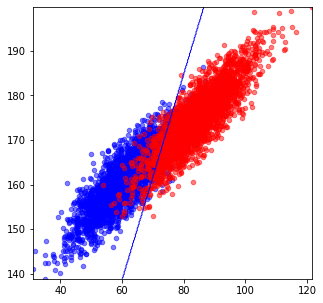

In [17]:
#%matplotlib inline
helper.plotBoundary(X_train, y_train,  clf, 100)

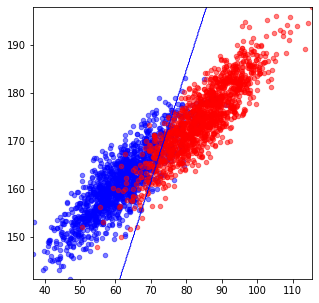

In [18]:
helper.plotBoundary(X_test, y_test,  clf, 50)

In [19]:
#grafica de la funcion de costo.
L=500
import numpy as np
w1=np.linspace(-0.1,0.5,30)
w2=np.linspace(-0.3,0.05,30)
w1,w2=np.meshgrid(w1,w2)
W=np.vstack([w1.flatten(),w2.flatten()])
aux1=1/(1+np.exp(-np.dot(X[0:L],W)))
aux2=1/(1+np.exp(np.dot(X[0:L],W)))
y_aux=np.repeat(y[0:L],aux1.shape[1]).reshape(aux1.shape)
loss=(y_aux*aux1+(1-y_aux)*aux2)/X.shape[0]
loss=loss.sum(axis=0).reshape(w1.shape)


In [20]:
loss.shape

(30, 30)

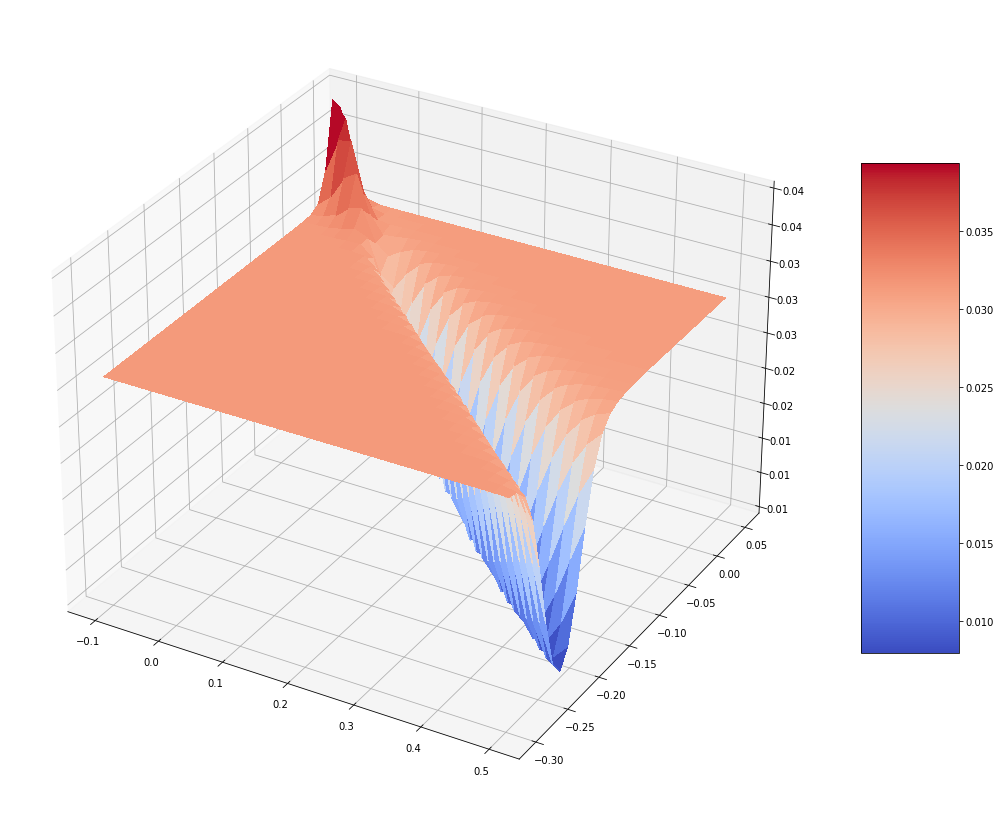

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=[18,18])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(w1, w2, loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [22]:
w1.shape

(30, 30)

In [23]:
# Regresión logística en Keras
# Regresión logística en Keras
import numpy as np
from keras.models import Sequential #Para poder definir un modelo secuencial
from keras.layers import Dense, BatchNormalization #Para poder usar capas densas
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.animation as animation

In [24]:
def show_learning(optimizer='Adam', batch_size=32,epochs=10,filename='movie.mp4'):
    model=Sequential() #Queda definido el modelo sequencial
    #model.add(BatchNormalization())
    model.add(Dense(1, input_shape=(2,),activation='sigmoid',use_bias=False,kernel_initializer='zeros',bias_initializer='zeros'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    learning_curve=helper.plot_learning_curve(plot_interval=1,
                                              evaluate_interval=None,
                                              x_val=None,
                                              y_val_categorical=None,
                                              epochs=epochs)
    def get_weights(model):
        w1=model.layers[0].get_weights()[0][0][0]
        w2=model.layers[0].get_weights()[0][1][0]
        return [w1,w2]
    def set_weights(model, w1, w2):
        weights=model.layers[0].get_weights()
        weights[0][0][0]=w1
        weights[0][1][0]=w2
        model.layers[0].set_weights(weights)
    log_weights=helper.log_weights(get_weights)
    set_weights(model=model,w1=0.1,w2=-0.14)
    X_loss=X_train[0:100,:]
    y_loss=y_train[0:100]
    %matplotlib inline
    history=model.fit(X_train, y_train, validation_data=[X_test,y_test],
                  epochs=epochs,verbose=0, batch_size=batch_size,shuffle = True,
                  callbacks=[learning_curve, log_weights])
    loss=list()
    % matplotlib qt
    w1_mesh,w2_mesh,J=helper.plot_loss_surface(X_loss, y_loss, model, set_weights, [-1,0.5], [-0.2,0.5],20,plot=True)
    for w in log_weights.weights:
        loss.append(helper.get_loss(w[0],w[1],model,X=X_loss,y=y_loss,set_weights=set_weights))
    data = np.hstack([np.array(log_weights.weights),np.array(loss).T.reshape(-1,1)]).T
    fig, ax = plt.subplots()
    CS = ax.contourf(w1_mesh, w2_mesh, J, 100, cmap=plt.cm.coolwarm)
    line, = ax.plot([], [],'k')
    def animate(i):
        line.set_data(data[0,:i],data[1,:i])  # update the data
        if i % int(len(loss)/100)==0:
            porc=int(i/len(loss)*100)
            print("\r {}%".format(porc),end="")
        return line,
    ani = animation.FuncAnimation(fig, animate, len(loss),
                              interval=25, blit=False)
    ani.save(filename)
    plt.show()


In [25]:
lr=1e-4
momentum=0.99
nesterov=0.99  # espera un boolean la funcion SGD.?? # tutoria @TODO
#nesterov=False # espera un boolean la funcion SGD.??
decay=0
batch_size=32
epochs=5
optimizer=SGD(lr=lr,momentum=momentum, nesterov=nesterov,decay=decay)
show_learning(optimizer=optimizer,
              batch_size=batch_size,
              epochs=epochs,
              filename='sgd-{}-{}-{}-{}-{}-{}.mp4'.format(lr,momentum,nesterov,decay,batch_size,epochs))

/home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Begin training


TypeError: in user code:

    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/keras/engine/training.py:774 train_step  *
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:530 minimize  **
        return self.apply_gradients(grads_and_vars, name=name)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:667 apply_gradients
        return self._distributed_apply(strategy, grads_and_vars, name,
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:714 _distributed_apply
        update_op = distribution.extended.update(
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2578 update
        return self._replica_ctx_update(
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2457 _replica_ctx_update
        return replica_context.merge_call(merge_fn, args=args, kwargs=kwargs)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3048 merge_call
        return self._merge_call(merge_fn, args, kwargs)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3055 _merge_call
        return merge_fn(self._strategy, *args, **kwargs)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2455 merge_fn  **
        return self.update(var, fn, merged_args, merged_kwargs, group=group)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2576 update
        return self._update(var, fn, args, kwargs, group)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3622 _update
        return self._update_non_slot(var, fn, (var,) + tuple(args), kwargs, group)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3628 _update_non_slot
        result = fn(*args, **kwargs)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:697 apply_grad_to_update_var  **
        update_op = self._resource_apply_dense(grad, var, **apply_kwargs)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/gradient_descent.py:136 _resource_apply_dense
        return gen_training_ops.ResourceApplyKerasMomentum(
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/util/tf_export.py:404 wrapper
        return f(**kwargs)
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/ops/gen_training_ops.py:2028 resource_apply_keras_momentum
        use_nesterov = _execute.make_bool(use_nesterov, "use_nesterov")
    /home/j3nnn1/anaconda3/envs/pep/lib/python3.9/site-packages/tensorflow/python/eager/execute.py:186 make_bool
        raise TypeError("Expected bool for argument '%s' not %s." %

    TypeError: Expected bool for argument 'use_nesterov' not 0.99.


In [ ]:
%matplotlib inline
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(w1_mesh, w2_mesh, J, 100, cmap=plt.cm.coolwarm)
ax2.plot(np.array(log_weights.weights).T[0],np.array(log_weights.weights).T[1],'k')
plt.show()